# Implementing Gould 2-par PSPL

In [2]:
from Common_functions import  localize_event, prepare, F_t, cal_chisqr

%matplotlib inline

In [3]:
import glob,os,sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
import re
from tqdm import tqdm
import scipy.stats as st
from os.path import expanduser
import cmath
import scipy.optimize as op
import time
import gzip
from scipy.interpolate import interp1d
import pandas as pd
from scipy.interpolate import interp1d
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import (mark_inset,inset_axes,InsetPosition) 
import traceback

In [4]:
def Gould_2_par_PSPL (t, m, t0, t_eff, f1, f0):
    
    t0_ini = t0
    t_eff_ini = t_eff
    
    paramt = [t0_ini, t_eff_ini, f1, f0]
    
    popt, pcov = op.curve_fit(F_t, t, m, p0=paramt)
    
    
    
    return popt

In [5]:
# Path to the larger dataset
home = os.path.expanduser("~")

temp = home+'/Library/Mobile Documents/com~apple~CloudDocs/Microlensing_Data_Challeng/data-challenge-1/alldclc/'#lc/'
direc = os.listdir(temp)

In [27]:
name = 'mag.dcnormffp_0_82_34.det.lc.W149'
f = home+'/Library/Mobile Documents/com~apple~CloudDocs/Microlensing_Data_Challeng/data-challenge-1/alldclc/'+str(name)
t,m,e = np.loadtxt(f,unpack=True)

print len(t)

F = 100**((np.max(m)-m)/5)

df = pd.DataFrame({'t': t, 'Flux_Ratio': F, 'magnitude': m, 'm_err': e})

peaks = np.array([t[np.argmin(m)]])
baseline, event, it0 = localize_event(df['t'], peaks[0],70)
base_mag = np.median(df['magnitude'][baseline])
df['A'] = 10 ** (0.4*(base_mag - df['magnitude']))
df['A_max'] = 10 ** (0.4*(base_mag - (df['magnitude']-df['m_err'])))
df['A_min'] = 10 ** (0.4*(base_mag - (df['magnitude']+df['m_err'])))
df['A_err'] = (df.A_max - df.A_min)/2

38568


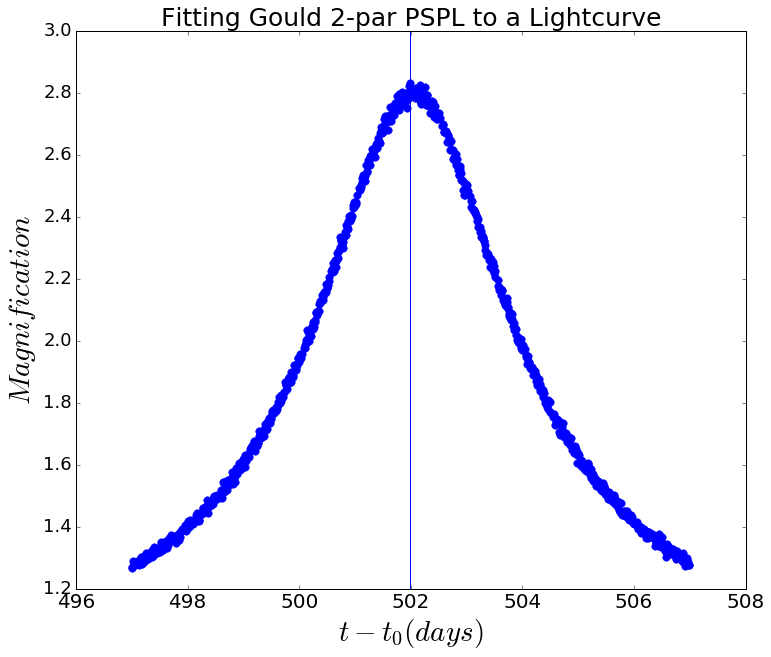

In [40]:
t0 = 502
dt = 5
t1 = t0-dt
t2 = t0+dt
plt.figure()
plt.title('Fitting Gould 2-par PSPL to a Lightcurve', size=25)
plt.xlabel('$t - t_0 (days)$',size=29)
plt.ylabel('$Magnification$',size=29)
plt.tick_params(axis='y',labelsize=18)
plt.tick_params(axis='x',labelsize=20)
plt.plot(df['t'][(df.t>t1+2458234)&(df.t<t2+2458234)]-2458234, df['A'][(df.t>t1+2458234)&(df.t<t2+2458234)], 'b.', markersize=15)
#plt.plot(t-22458234,result['solution'][i],'g-', linewidth=3)
plt.axvline(t[np.argmin(m)]-2458234)
#plt.xlim(515,540)
#plt.gca().invert_yaxis()
fig = plt.gcf()
fig.set_size_inches(12.0,10.0)
#fig.savefig('Trapezoid_FFP.png')

In [41]:
t = df['t'][(df.t>t1+2458234)&(df.t<t2+2458234)].values
m = df['magnitude'][(df.t>t1+2458234)&(df.t<t2+2458234)].values
e = df['A_err'][(df.t>t1+2458234)&(df.t<t2+2458234)].values
A = df['A'][(df.t>t1+2458234)&(df.t<t2+2458234)].values



In [42]:
t0_ini = t[np.argmax(A)] #t[np.argmax(m[m <np.percentile(m ,[0,99.95] )[1]])]
t_eff = [0.01, 0.5, 2, 5, 10, 20]
f1 = 0.5
f0 = 0.5
param = {'t_eff': [], 'chi_sqr': []}

for i in range(len(t_eff)):
    
#     try:
    param['t_eff'].append(Gould_2_par_PSPL(t, A, t0_ini, t_eff[i], f1, f0))
    param['chi_sqr'].append(calc_chisq2(m, F_t(t, *param['t_eff'][i]), e ))
    
print param['t_eff'][np.argmin(param['chi_sqr'])]
print calc_chisq2(A[t>t0_ini], F_t(t[t>t0_ini],*param['t_eff'][np.argmin(param['chi_sqr'])]), e[t>t0_ini])/(len(t)-5)
print calc_chisq2(A[t<t0_ini], F_t(t[t<t0_ini],*param['t_eff'][np.argmin(param['chi_sqr'])]), e[t<t0_ini])/(len(t)-5)
print calc_chisq2(A, np.ones(len(A)), e )/(len(t)-5)


#     except (RuntimeError, TypeError, NameError, ValueError):
#         print i
#         pass

[ 2.45873604e+06  1.77728822e+00  1.53782394e+00 -8.02271128e-01]
0.4829651131106073
0.41852656735024485
6204.862223962007


In [43]:
param

{'chi_sqr': [2236460275.3995395,
  2236460275.264019,
  2236460275.360422,
  2236460275.1184673,
  2236460612.23228,
  2236460346.8681917],
 't_eff': [array([ 2.45873604e+06,  1.77728829e+00,  1.53782400e+00, -8.02271250e-01]),
  array([ 2.45873604e+06,  1.77728822e+00,  1.53782399e+00, -8.02271211e-01]),
  array([ 2.45873604e+06,  1.77728834e+00,  1.53782400e+00, -8.02271276e-01]),
  array([ 2.45873604e+06,  1.77728822e+00,  1.53782394e+00, -8.02271128e-01]),
  array([ 2.45873604e+06, -1.77728656e+00,  1.53782247e+00, -8.02269449e-01]),
  array([ 2.45873604e+06,  1.77728867e+00,  1.53782404e+00, -8.02271753e-01])]}

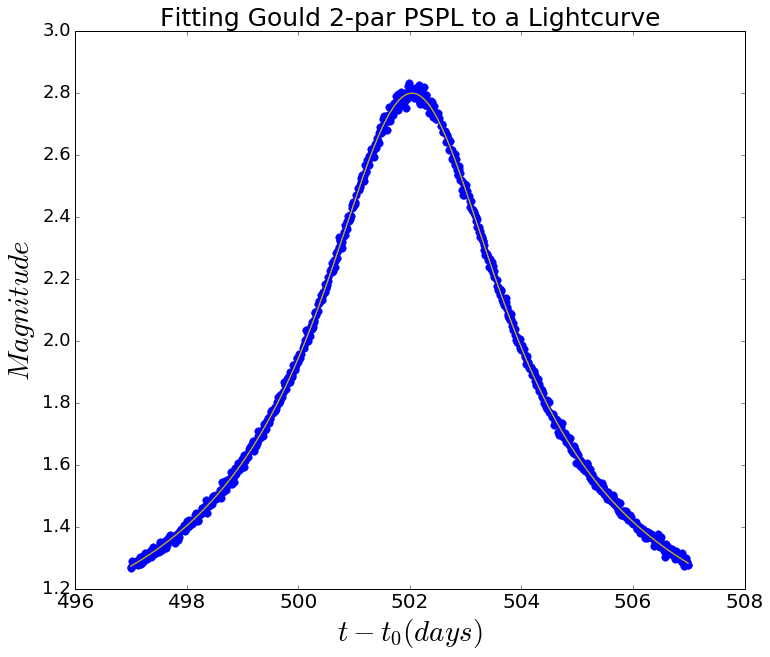

In [45]:
plt.figure()
plt.title('Fitting Gould 2-par PSPL to a Lightcurve', size=25)
plt.xlabel('$t - t_0 (days)$',size=29)
plt.ylabel('$Magnitude$',size=29)
plt.tick_params(axis='y',labelsize=18)
plt.tick_params(axis='x',labelsize=20)
plt.plot(t-2458234, A, 'b.', markersize=15)
#print param['t_eff=5']
for i in range(len(t_eff)):


    plt.plot(t-2458234, F_t(t, *param['t_eff'][i] ),'-')


#plt.xlim(515,540)
#plt.gca().invert_yaxis()
fig = plt.gcf()
fig.set_size_inches(12.0,10.0)
#fig.savefig('Trapezoid_FFP.png')

In [ ]:
np.sum((A-np.ones(len(A)))**2/(e**2))

In [60]:
# fitting Gould 2-par function to all light curves


direc.sort()
result = {'name':[], 't0_exp':[], 't_eff_exp':[],'t_eff':[], 'f1_exp':[], 'f0_exp':[], 'min_chi_sqr':[], 'reduced_chi_sqr':[],
         'xdata':[], 'ydata':[], 'solution': [], 'chi_sqr_base': [],'reduced_chi_sqr_base': [], 'chi_sqr_right': [],
          'chi_sqr_left': [], 'reduced_chi_sqr_right':[], 'reduced_chi_sqr_left':[]}
c = 0 

for f in tqdm(direc):
    #
    
    if  f.endswith('.W149') and f.startswith('mag.'):#f.endswith('.txt') and f.split('_')[2].startswith('W'):
        
        #print f
        c = c+1 
        t,m,e = np.loadtxt(temp+f,unpack=True)

        F = 100**((np.max(m)-m)/5)

        df = pd.DataFrame({'t': t, 'Flux_Ratio': F, 'magnitude': m, 'm_err': e})

        t0_ini = t[np.argmin(m)]
        dt = 10
        t = df['t'][(df.t>t0_ini-dt)&(df.t<t0_ini+dt)].values
        m = df['magnitude'][(df.t>t0_ini-dt)&(df.t<t0_ini+dt)].values
        



        peaks = np.array([t[np.argmin(m)]])
        baseline, event, it0 = localize_event(df['t'], peaks[0],70)
        base_mag = np.median(df['magnitude'][baseline])
        df['A'] = 10 ** (0.4*(base_mag - df['magnitude']))
        df['A_max'] = 10 ** (0.4*(base_mag - (df['magnitude']-df['m_err'])))
        df['A_min'] = 10 ** (0.4*(base_mag - (df['magnitude']+df['m_err'])))
        df['A_err'] = (df.A_max - df.A_min)/2

        A = df['A'][(df.t>t0_ini-dt)&(df.t<t0_ini+dt)].values 
        Aerr = df['A_err'][(df.t>t0_ini-dt)&(df.t<t0_ini+dt)].values


#         plt.plot(t,m,'b.')
#         plt.axvline(t0_ini,color='k')

        t_eff = [0.01,0.1, 0.5, 2, 5, 10, 20]
        f1 = 0.5
        f0 = 0.5
        res = {'param': [], 't_eff': [], 'chi_sqr': []}

        for i in t_eff:

            try:
                #print i
                #print Gould_2_par_PSPL(t, m, t0_ini, i, f1, f0)
                res['param'].append(Gould_2_par_PSPL(t, A, t0_ini, i, f1, f0))
                res['t_eff'].append(i)
                res['chi_sqr'].append(calc_chisq2(A, F_t(t,*Gould_2_par_PSPL(t, A, t0_ini, i, f1, f0)), Aerr))

            except (RuntimeError, TypeError, NameError, ValueError):
                #print 'error' + str(i)
                pass
        if res['chi_sqr'] == []:

            res['param'].append([0.0,0.0,0.0,0.0])
            res['t_eff'].append(0.0)
            res['chi_sqr'].append(0.0)


        chi_sqr_right = calc_chisq2(A[t>t0_ini], F_t(t[t>t0_ini],*res['param'][np.argmin(res['chi_sqr'])]), Aerr[t>t0_ini])
        chi_sqr_left = calc_chisq2(A[t<t0_ini], F_t(t[t<t0_ini],*res['param'][np.argmin(res['chi_sqr'])]), Aerr[t<t0_ini])
        reduced_chi_sqr_right = calc_chisq2(A[t>t0_ini], F_t(t[t>t0_ini],*res['param'][np.argmin(res['chi_sqr'])]), Aerr[t>t0_ini])/(len(A[t>t0_ini])-4)
        reduced_chi_sqr_left = calc_chisq2(A[t<t0_ini], F_t(t[t<t0_ini],*res['param'][np.argmin(res['chi_sqr'])]), Aerr[t<t0_ini])/(len(A[t<t0_ini])-4)


        #print chi_sqr_left, chi_sqr_right
        
        result['name'].append(f)
        result['t0_exp'].append(res['param'][np.argmin(res['chi_sqr'])][0])
        result['t_eff'].append(res['t_eff'][np.argmin(res['chi_sqr'])])
        result['t_eff_exp'].append(res['param'][np.argmin(res['chi_sqr'])][1])
        result['f1_exp'].append(res['param'][np.argmin(res['chi_sqr'])][2])
        result['f0_exp'].append(res['param'][np.argmin(res['chi_sqr'])][3])
        result['min_chi_sqr'].append(np.min(res['chi_sqr']))
        result['reduced_chi_sqr'].append(np.min(res['chi_sqr'])/(len(t)-4))
        result['xdata'].append(t)
        result['ydata'].append(A)
        result['solution'].append(F_t(t,*res['param'][np.argmin(res['chi_sqr'])]))
        result['chi_sqr_base'].append(calc_chisq2(A, np.ones(len(t)), Aerr))
        result['reduced_chi_sqr_base'].append(np.min(calc_chisq2(A, np.ones(len(t)), Aerr)/(len(t)-4)))
        result['chi_sqr_right'].append(chi_sqr_right)
        result['chi_sqr_left'].append(chi_sqr_left)
        result['reduced_chi_sqr_right'].append(reduced_chi_sqr_right)
        result['reduced_chi_sqr_left'].append(reduced_chi_sqr_left)
        

#     if c == 4:
#         break

print 'done'





100%|██████████| 9948/9948 [49:08<00:00,  3.37it/s]

done


In [83]:
info1 = pd.read_csv('ombin.CSV')
info2 = pd.read_csv('omcassan.CSV')
info3 = pd.read_csv('dccv.CSV')
info4 = pd.read_csv('dcnormffp.CSV')

In [84]:
frames = [info1, info2, info3, info4]

info = pd.concat(frames)

In [85]:
info['t0_exp'] = np.zeros(len(info))
info['t_eff'] = np.zeros(len(info))
info['t_eff_exp'] = np.zeros(len(info))
info['f1_exp'] = np.zeros(len(info))
info['f0_exp'] = np.zeros(len(info))
info['min_chi_sqr'] = np.zeros(len(info))
info['chi_sqr_base'] = np.zeros(len(info))
info['chi_sqr_right'] = np.zeros(len(info))
info['chi_sqr_left'] = np.zeros(len(info))
info['DOF'] = np.zeros(len(info))
info['reduced_chi_sqr'] = np.zeros(len(info))
info['reduced_chi_sqr_base'] = np.zeros(len(info))
info['reduced_chi_sqr_right'] = np.zeros(len(info))
info['reduced_chi_sqr_left'] = np.zeros(len(info))

In [86]:
info = info.rename(columns={"index": "name"})

In [87]:
for i in range(len(result['name'])):

    if result['name'][i].split('.lc')[0].endswith('all'): 
        result['name'][i] = result['name'][i].split('all')[0]+'det'+result['name'][i].split('all')[1]

In [88]:

for i in tqdm(range(len(result['name']))):
     
    
    info.loc[info.name == result['name'][i], 't0_exp'] = result['t0_exp'][i]
    info.loc[info.name == result['name'][i], 't_eff'] = result['t_eff'][i]
    info.loc[info.name == result['name'][i], 't_eff_exp'] = result['t_eff_exp'][i]
    info.loc[info.name == result['name'][i], 'f1_exp'] = result['f1_exp'][i]
    info.loc[info.name == result['name'][i], 'f0_exp'] = result['f0_exp'][i]
    info.loc[info.name == result['name'][i], 'min_chi_sqr'] = result['min_chi_sqr'][i]
    info.loc[info.name == result['name'][i], 'chi_sqr_base'] = result['chi_sqr_base'][i]
    info.loc[info.name == result['name'][i], 'chi_sqr_right'] = result['chi_sqr_right'][i]
    info.loc[info.name == result['name'][i], 'chi_sqr_left'] = result['chi_sqr_left'][i]
    info.loc[info.name == result['name'][i], 'DOF'] = len(result['xdata'][i])-5
    info.loc[info.name == result['name'][i], 'reduced_chi_sqr'] = result['reduced_chi_sqr'][i]
    info.loc[info.name == result['name'][i], 'reduced_chi_sqr_base'] = result['reduced_chi_sqr_base'][i]
    info.loc[info.name == result['name'][i], 'reduced_chi_sqr_right'] = result['reduced_chi_sqr_right'][i]
    info.loc[info.name == result['name'][i], 'reduced_chi_sqr_left'] = result['reduced_chi_sqr_left'][i]



    
    if not result['name'][i] in info.name.values:
        print result['name'][i]

 79%|███████▉  | 3682/4650 [03:13<00:50, 19.06it/s]

mag.omcassan_0_100_1197.det.lc.W149
mag.omcassan_0_100_3114.det.lc.W149


 79%|███████▉  | 3686/4650 [03:13<00:50, 19.06it/s]

mag.omcassan_0_100_66.det.lc.W149


 79%|███████▉  | 3692/4650 [03:13<00:50, 19.06it/s]

mag.omcassan_0_10_1228.det.lc.W149


 80%|███████▉  | 3706/4650 [03:14<00:49, 19.06it/s]

mag.omcassan_0_21_2040.det.lc.W149
mag.omcassan_0_21_414.det.lc.W149
mag.omcassan_0_22_3213.det.lc.W149


 80%|████████  | 3722/4650 [03:15<00:48, 19.06it/s]

mag.omcassan_0_34_1491.det.lc.W149
mag.omcassan_0_35_2018.det.lc.W149


 80%|████████  | 3730/4650 [03:15<00:48, 19.06it/s]

mag.omcassan_0_44_669.det.lc.W149
mag.omcassan_0_46_400.det.lc.W149


 80%|████████  | 3736/4650 [03:16<00:47, 19.05it/s]

mag.omcassan_0_48_1719.det.lc.W149
mag.omcassan_0_49_1633.det.lc.W149


 80%|████████  | 3740/4650 [03:16<00:47, 19.05it/s]

mag.omcassan_0_58_1019.det.lc.W149


 81%|████████  | 3744/4650 [03:16<00:47, 19.05it/s]

mag.omcassan_0_59_1633.det.lc.W149
mag.omcassan_0_59_2013.det.lc.W149


 81%|████████  | 3748/4650 [03:16<00:47, 19.05it/s]

mag.omcassan_0_61_1201.det.lc.W149
mag.omcassan_0_61_384.det.lc.W149
mag.omcassan_0_61_681.det.lc.W149
mag.omcassan_0_63_316.det.lc.W149


 81%|████████  | 3754/4650 [03:17<00:47, 19.05it/s]

mag.omcassan_0_6_1191.det.lc.W149
mag.omcassan_0_71_259.det.lc.W149


 81%|████████  | 3772/4650 [03:17<00:46, 19.06it/s]

mag.omcassan_0_7_534.det.lc.W149
mag.omcassan_0_83_241.det.lc.W149
mag.omcassan_0_84_720.det.lc.W149


 81%|████████  | 3778/4650 [03:18<00:45, 19.06it/s]

mag.omcassan_0_86_2143.det.lc.W149
mag.omcassan_0_86_2152.det.lc.W149
mag.omcassan_0_87_1718.det.lc.W149
mag.omcassan_0_87_2127.det.lc.W149


 81%|████████▏ | 3785/4650 [03:18<00:45, 19.06it/s]

mag.omcassan_0_88_2050.det.lc.W149
mag.omcassan_0_89_114.det.lc.W149


 82%|████████▏ | 3790/4650 [03:18<00:45, 19.06it/s]

mag.omcassan_0_97_1005.det.lc.W149
mag.omcassan_0_97_964.det.lc.W149
mag.omcassan_0_98_1251.det.lc.W149


 82%|████████▏ | 3795/4650 [03:19<00:44, 19.06it/s]

mag.omcassan_0_98_1412.det.lc.W149
mag.omcassan_0_99_1601.det.lc.W149


 82%|████████▏ | 3805/4650 [03:19<00:44, 19.06it/s]

mag.omcassan_10_18_463.det.lc.W149


 82%|████████▏ | 3811/4650 [03:19<00:44, 19.06it/s]

mag.omcassan_10_44_787.det.lc.W149
mag.omcassan_10_47_126.det.lc.W149
mag.omcassan_10_50_253.det.lc.W149
mag.omcassan_10_5_594.det.lc.W149


 82%|████████▏ | 3817/4650 [03:20<00:43, 19.06it/s]

mag.omcassan_10_6_423.det.lc.W149
mag.omcassan_10_72_1307.det.lc.W149


 82%|████████▏ | 3821/4650 [03:20<00:43, 19.06it/s]

mag.omcassan_10_73_847.det.lc.W149


 82%|████████▏ | 3827/4650 [03:20<00:43, 19.06it/s]

mag.omcassan_10_89_385.det.lc.W149
mag.omcassan_10_98_148.det.lc.W149


 83%|████████▎ | 3839/4650 [03:21<00:42, 19.06it/s]

mag.omcassan_1_110_551.det.lc.W149


 83%|████████▎ | 3843/4650 [03:21<00:42, 19.06it/s]

mag.omcassan_1_111_474.det.lc.W149
mag.omcassan_1_112_1070.det.lc.W149
mag.omcassan_1_112_65.det.lc.W149


 83%|████████▎ | 3849/4650 [03:21<00:42, 19.06it/s]

mag.omcassan_1_113_1809.det.lc.W149


 83%|████████▎ | 3855/4650 [03:22<00:41, 19.06it/s]

mag.omcassan_1_11_182.det.lc.W149
mag.omcassan_1_18_442.det.lc.W149
mag.omcassan_1_18_674.det.lc.W149


 83%|████████▎ | 3861/4650 [03:22<00:41, 19.06it/s]

mag.omcassan_1_20_288.det.lc.W149
mag.omcassan_1_20_979.det.lc.W149
mag.omcassan_1_23_1262.det.lc.W149


 83%|████████▎ | 3867/4650 [03:22<00:41, 19.06it/s]

mag.omcassan_1_23_1397.det.lc.W149
mag.omcassan_1_23_990.det.lc.W149


 83%|████████▎ | 3871/4650 [03:23<00:40, 19.06it/s]

mag.omcassan_1_31_529.det.lc.W149


 83%|████████▎ | 3879/4650 [03:23<00:40, 19.06it/s]

mag.omcassan_1_48_1401.det.lc.W149


 84%|████████▎ | 3885/4650 [03:23<00:40, 19.06it/s]

mag.omcassan_1_57_2109.det.lc.W149


 84%|████████▎ | 3894/4650 [03:24<00:39, 19.06it/s]

mag.omcassan_1_5_2403.det.lc.W149
mag.omcassan_1_5_2609.det.lc.W149
mag.omcassan_1_60_992.det.lc.W149
mag.omcassan_1_62_1260.det.lc.W149


 84%|████████▍ | 3898/4650 [03:24<00:39, 19.06it/s]

mag.omcassan_1_63_1559.det.lc.W149
mag.omcassan_1_70_1516.det.lc.W149


 84%|████████▍ | 3906/4650 [03:24<00:39, 19.06it/s]

mag.omcassan_1_73_1372.det.lc.W149


 84%|████████▍ | 3912/4650 [03:25<00:38, 19.06it/s]

mag.omcassan_1_75_1206.det.lc.W149
mag.omcassan_1_75_250.det.lc.W149


 84%|████████▍ | 3922/4650 [03:25<00:38, 19.06it/s]

mag.omcassan_1_84_1418.det.lc.W149
mag.omcassan_1_89_1387.det.lc.W149
mag.omcassan_1_89_1625.det.lc.W149


 84%|████████▍ | 3926/4650 [03:25<00:37, 19.06it/s]

mag.omcassan_1_89_565.det.lc.W149


 85%|████████▍ | 3932/4650 [03:26<00:37, 19.06it/s]

mag.omcassan_1_98_479.det.lc.W149


 85%|████████▍ | 3944/4650 [03:26<00:37, 19.06it/s]

mag.omcassan_2_10_214.det.lc.W149
mag.omcassan_2_110_1013.det.lc.W149
mag.omcassan_2_110_1407.det.lc.W149
mag.omcassan_2_110_2700.det.lc.W149


 85%|████████▍ | 3950/4650 [03:27<00:36, 19.06it/s]

mag.omcassan_2_112_3277.det.lc.W149


 85%|████████▌ | 3956/4650 [03:27<00:36, 19.06it/s]

mag.omcassan_2_115_1010.det.lc.W149


 85%|████████▌ | 3962/4650 [03:27<00:36, 19.06it/s]

mag.omcassan_2_20_1425.det.lc.W149
mag.omcassan_2_20_253.det.lc.W149


 85%|████████▌ | 3968/4650 [03:28<00:35, 19.06it/s]

mag.omcassan_2_24_1036.det.lc.W149
mag.omcassan_2_31_1443.det.lc.W149
mag.omcassan_2_31_37.det.lc.W149


 85%|████████▌ | 3972/4650 [03:28<00:35, 19.06it/s]

mag.omcassan_2_31_832.det.lc.W149
mag.omcassan_2_33_54.det.lc.W149


 86%|████████▌ | 3984/4650 [03:29<00:34, 19.06it/s]

mag.omcassan_2_50_216.det.lc.W149
mag.omcassan_2_50_726.det.lc.W149


 86%|████████▌ | 3988/4650 [03:29<00:34, 19.06it/s]

mag.omcassan_2_58_1579.det.lc.W149


 86%|████████▌ | 4006/4650 [03:30<00:33, 19.06it/s]

mag.omcassan_2_76_219.det.lc.W149


 86%|████████▋ | 4020/4650 [03:30<00:33, 19.06it/s]

mag.omcassan_2_87_970.det.lc.W149
mag.omcassan_2_88_1615.det.lc.W149
mag.omcassan_2_96_1919.det.lc.W149


 87%|████████▋ | 4026/4650 [03:31<00:32, 19.06it/s]

mag.omcassan_2_98_1355.det.lc.W149
mag.omcassan_3_101_1518.det.lc.W149


 87%|████████▋ | 4038/4650 [03:31<00:32, 19.06it/s]

mag.omcassan_3_10_404.det.lc.W149
mag.omcassan_3_10_486.det.lc.W149
mag.omcassan_3_10_628.det.lc.W149


 87%|████████▋ | 4042/4650 [03:32<00:31, 19.06it/s]

mag.omcassan_3_110_1304.det.lc.W149


 87%|████████▋ | 4054/4650 [03:32<00:31, 19.06it/s]

mag.omcassan_3_11_2077.det.lc.W149
mag.omcassan_3_11_3148.det.lc.W149
mag.omcassan_3_18_3023.det.lc.W149


 87%|████████▋ | 4060/4650 [03:33<00:30, 19.06it/s]

mag.omcassan_3_20_1560.det.lc.W149
mag.omcassan_3_20_1641.det.lc.W149


 87%|████████▋ | 4066/4650 [03:33<00:30, 19.06it/s]

mag.omcassan_3_21_3178.det.lc.W149


 88%|████████▊ | 4072/4650 [03:33<00:30, 19.06it/s]

mag.omcassan_3_24_1912.det.lc.W149
mag.omcassan_3_31_677.det.lc.W149


 88%|████████▊ | 4078/4650 [03:34<00:30, 19.05it/s]

mag.omcassan_3_33_976.det.lc.W149


 88%|████████▊ | 4082/4650 [03:34<00:29, 19.05it/s]

mag.omcassan_3_49_397.det.lc.W149


 88%|████████▊ | 4092/4650 [03:34<00:29, 19.04it/s]

mag.omcassan_3_60_1155.det.lc.W149
mag.omcassan_3_60_610.det.lc.W149
mag.omcassan_3_61_1090.det.lc.W149


 88%|████████▊ | 4102/4650 [03:35<00:28, 19.04it/s]

mag.omcassan_3_70_2948.det.lc.W149


 88%|████████▊ | 4106/4650 [03:35<00:28, 19.04it/s]

mag.omcassan_3_72_1843.det.lc.W149
mag.omcassan_3_72_2269.det.lc.W149


 89%|████████▊ | 4116/4650 [03:36<00:28, 19.04it/s]

mag.omcassan_3_75_2250.det.lc.W149
mag.omcassan_3_76_472.det.lc.W149


 89%|████████▊ | 4120/4650 [03:36<00:27, 19.04it/s]

mag.omcassan_3_83_382.det.lc.W149
mag.omcassan_3_84_119.det.lc.W149


 89%|████████▉ | 4128/4650 [03:36<00:27, 19.04it/s]

mag.omcassan_3_86_862.det.lc.W149
mag.omcassan_3_87_49.det.lc.W149


 89%|████████▉ | 4136/4650 [03:37<00:26, 19.04it/s]

mag.omcassan_3_89_51.det.lc.W149
mag.omcassan_3_89_57.det.lc.W149
mag.omcassan_3_96_1862.det.lc.W149


 89%|████████▉ | 4142/4650 [03:37<00:26, 19.04it/s]

mag.omcassan_3_97_694.det.lc.W149


 89%|████████▉ | 4146/4650 [03:37<00:26, 19.04it/s]

mag.omcassan_3_9_165.det.lc.W149
mag.omcassan_4_100_282.det.lc.W149


 89%|████████▉ | 4152/4650 [03:38<00:26, 19.04it/s]

mag.omcassan_4_100_393.det.lc.W149


 89%|████████▉ | 4156/4650 [03:38<00:25, 19.04it/s]

mag.omcassan_4_102_2853.det.lc.W149
mag.omcassan_4_102_369.det.lc.W149


 90%|████████▉ | 4162/4650 [03:38<00:25, 19.03it/s]

mag.omcassan_4_111_506.det.lc.W149
mag.omcassan_4_112_1245.det.lc.W149


 90%|████████▉ | 4166/4650 [03:38<00:25, 19.03it/s]

mag.omcassan_4_112_585.det.lc.W149


 90%|████████▉ | 4174/4650 [03:39<00:25, 19.03it/s]

mag.omcassan_4_115_3069.det.lc.W149
mag.omcassan_4_115_510.det.lc.W149


 90%|████████▉ | 4180/4650 [03:39<00:24, 19.03it/s]

mag.omcassan_4_18_1719.det.lc.W149


 90%|█████████ | 4186/4650 [03:39<00:24, 19.03it/s]

mag.omcassan_4_20_1994.det.lc.W149


 90%|█████████ | 4190/4650 [03:40<00:24, 19.03it/s]

mag.omcassan_4_22_1056.det.lc.W149
mag.omcassan_4_22_117.det.lc.W149


 90%|█████████ | 4200/4650 [03:40<00:23, 19.03it/s]

mag.omcassan_4_32_2432.det.lc.W149
mag.omcassan_4_32_2978.det.lc.W149
mag.omcassan_4_34_1702.det.lc.W149


 90%|█████████ | 4204/4650 [03:40<00:23, 19.03it/s]

mag.omcassan_4_35_120.det.lc.W149
mag.omcassan_4_36_1502.det.lc.W149


 91%|█████████ | 4210/4650 [03:41<00:23, 19.03it/s]

mag.omcassan_4_45_2664.det.lc.W149
mag.omcassan_4_46_1589.det.lc.W149


 91%|█████████ | 4214/4650 [03:41<00:22, 19.03it/s]

mag.omcassan_4_48_1128.det.lc.W149
mag.omcassan_4_48_41.det.lc.W149
mag.omcassan_4_49_18.det.lc.W149


 91%|█████████ | 4219/4650 [03:41<00:22, 19.04it/s]

mag.omcassan_4_50_713.det.lc.W149
mag.omcassan_4_57_3017.det.lc.W149


 91%|█████████ | 4226/4650 [03:41<00:22, 19.04it/s]

mag.omcassan_4_58_965.det.lc.W149
mag.omcassan_4_59_1960.det.lc.W149


 91%|█████████ | 4234/4650 [03:42<00:21, 19.04it/s]

mag.omcassan_4_5_2136.det.lc.W149
mag.omcassan_4_5_2998.det.lc.W149
mag.omcassan_4_5_3035.det.lc.W149


 91%|█████████ | 4240/4650 [03:42<00:21, 19.04it/s]

mag.omcassan_4_61_1408.det.lc.W149
mag.omcassan_4_61_1697.det.lc.W149
mag.omcassan_4_61_418.det.lc.W149


 91%|█████████▏| 4249/4650 [03:43<00:21, 19.04it/s]

mag.omcassan_4_71_388.det.lc.W149


 92%|█████████▏| 4257/4650 [03:43<00:20, 19.04it/s]

mag.omcassan_4_76_1183.det.lc.W149
mag.omcassan_4_7_1120.det.lc.W149
mag.omcassan_4_7_1389.det.lc.W149


 92%|█████████▏| 4261/4650 [03:43<00:20, 19.04it/s]

mag.omcassan_4_7_2334.det.lc.W149
mag.omcassan_4_85_882.det.lc.W149
mag.omcassan_4_86_3148.det.lc.W149


 92%|█████████▏| 4268/4650 [03:44<00:20, 19.04it/s]

mag.omcassan_4_88_147.det.lc.W149
mag.omcassan_4_89_26.det.lc.W149


 92%|█████████▏| 4278/4650 [03:44<00:19, 19.05it/s]

mag.omcassan_4_98_2078.det.lc.W149
mag.omcassan_4_99_747.det.lc.W149


 92%|█████████▏| 4290/4650 [03:45<00:18, 19.05it/s]

mag.omcassan_5_109_1444.det.lc.W149


 92%|█████████▏| 4301/4650 [03:45<00:18, 19.05it/s]

mag.omcassan_5_115_1345.det.lc.W149


 93%|█████████▎| 4315/4650 [03:46<00:17, 19.05it/s]

mag.omcassan_5_20_827.det.lc.W149


 93%|█████████▎| 4321/4650 [03:46<00:17, 19.04it/s]

mag.omcassan_5_22_702.det.lc.W149


 93%|█████████▎| 4325/4650 [03:47<00:17, 19.04it/s]

mag.omcassan_5_24_2829.det.lc.W149
mag.omcassan_5_31_1788.det.lc.W149
mag.omcassan_5_32_2780.det.lc.W149


 93%|█████████▎| 4329/4650 [03:47<00:16, 19.04it/s]

mag.omcassan_5_32_901.det.lc.W149
mag.omcassan_5_33_1030.det.lc.W149


 93%|█████████▎| 4333/4650 [03:47<00:16, 19.04it/s]

mag.omcassan_5_33_2063.det.lc.W149
mag.omcassan_5_33_494.det.lc.W149
mag.omcassan_5_35_1368.det.lc.W149


 93%|█████████▎| 4339/4650 [03:47<00:16, 19.05it/s]

mag.omcassan_5_36_594.det.lc.W149


 93%|█████████▎| 4347/4650 [03:48<00:15, 19.05it/s]

mag.omcassan_5_48_2673.det.lc.W149


 94%|█████████▎| 4356/4650 [03:48<00:15, 19.05it/s]

mag.omcassan_5_58_943.det.lc.W149
mag.omcassan_5_59_364.det.lc.W149
mag.omcassan_5_59_423.det.lc.W149
mag.omcassan_5_59_58.det.lc.W149


 94%|█████████▍| 4365/4650 [03:49<00:14, 19.05it/s]

mag.omcassan_5_63_1267.det.lc.W149


 94%|█████████▍| 4373/4650 [03:49<00:14, 19.05it/s]

mag.omcassan_5_70_1893.det.lc.W149
mag.omcassan_5_72_771.det.lc.W149


 94%|█████████▍| 4377/4650 [03:49<00:14, 19.06it/s]

mag.omcassan_5_73_1293.det.lc.W149
mag.omcassan_5_76_1362.det.lc.W149


 94%|█████████▍| 4385/4650 [03:50<00:13, 19.06it/s]

mag.omcassan_5_86_510.det.lc.W149


 94%|█████████▍| 4389/4650 [03:50<00:13, 19.06it/s]

mag.omcassan_5_96_2508.det.lc.W149
mag.omcassan_5_98_680.det.lc.W149


 95%|█████████▍| 4398/4650 [03:50<00:13, 19.06it/s]

mag.omcassan_6_100_449.det.lc.W149
mag.omcassan_6_101_674.det.lc.W149


 95%|█████████▍| 4402/4650 [03:50<00:13, 19.06it/s]

mag.omcassan_6_109_1439.det.lc.W149
mag.omcassan_6_110_1017.det.lc.W149


 95%|█████████▍| 4406/4650 [03:51<00:12, 19.06it/s]

mag.omcassan_6_113_876.det.lc.W149


 95%|█████████▍| 4411/4650 [03:51<00:12, 19.06it/s]

mag.omcassan_6_18_778.det.lc.W149
mag.omcassan_6_19_780.det.lc.W149
mag.omcassan_6_21_1422.det.lc.W149


 95%|█████████▍| 4416/4650 [03:51<00:12, 19.06it/s]

mag.omcassan_6_22_143.det.lc.W149
mag.omcassan_6_31_1211.det.lc.W149
mag.omcassan_6_32_1161.det.lc.W149


 95%|█████████▌| 4424/4650 [03:52<00:11, 19.06it/s]

mag.omcassan_6_37_515.det.lc.W149


 95%|█████████▌| 4428/4650 [03:52<00:11, 19.06it/s]

mag.omcassan_6_44_718.det.lc.W149
mag.omcassan_6_48_1044.det.lc.W149
mag.omcassan_6_48_138.det.lc.W149


 95%|█████████▌| 4438/4650 [03:52<00:11, 19.06it/s]

mag.omcassan_6_61_1145.det.lc.W149
mag.omcassan_6_63_275.det.lc.W149
mag.omcassan_6_6_1121.det.lc.W149


 96%|█████████▌| 4444/4650 [03:53<00:10, 19.06it/s]

mag.omcassan_6_6_1314.det.lc.W149
mag.omcassan_6_71_1009.det.lc.W149


 96%|█████████▌| 4448/4650 [03:53<00:10, 19.06it/s]

mag.omcassan_6_73_1158.det.lc.W149
mag.omcassan_6_74_46.det.lc.W149
mag.omcassan_6_74_69.det.lc.W149
mag.omcassan_6_83_728.det.lc.W149


 96%|█████████▌| 4464/4650 [03:54<00:09, 19.06it/s]

mag.omcassan_6_9_342.det.lc.W149
mag.omcassan_6_9_665.det.lc.W149


 96%|█████████▌| 4470/4650 [03:54<00:09, 19.06it/s]

mag.omcassan_7_109_476.det.lc.W149
mag.omcassan_7_10_1028.det.lc.W149
mag.omcassan_7_110_397.det.lc.W149


 96%|█████████▋| 4484/4650 [03:55<00:08, 19.06it/s]

mag.omcassan_7_18_1025.det.lc.W149
mag.omcassan_7_18_1395.det.lc.W149


 97%|█████████▋| 4490/4650 [03:55<00:08, 19.06it/s]

mag.omcassan_7_19_321.det.lc.W149


 97%|█████████▋| 4506/4650 [03:56<00:07, 19.06it/s]

mag.omcassan_7_35_1480.det.lc.W149
mag.omcassan_7_35_1849.det.lc.W149


 97%|█████████▋| 4514/4650 [03:56<00:07, 19.06it/s]

mag.omcassan_7_45_1506.det.lc.W149
mag.omcassan_7_46_132.det.lc.W149


 97%|█████████▋| 4520/4650 [03:57<00:06, 19.06it/s]

mag.omcassan_7_47_674.det.lc.W149


 97%|█████████▋| 4526/4650 [03:57<00:06, 19.06it/s]

mag.omcassan_7_61_349.det.lc.W149
mag.omcassan_7_6_217.det.lc.W149


 97%|█████████▋| 4532/4650 [03:57<00:06, 19.06it/s]

mag.omcassan_7_70_805.det.lc.W149
mag.omcassan_7_76_1006.det.lc.W149


 98%|█████████▊| 4540/4650 [03:58<00:05, 19.06it/s]

mag.omcassan_7_86_1057.det.lc.W149


 98%|█████████▊| 4546/4650 [03:58<00:05, 19.06it/s]

mag.omcassan_8_111_1331.det.lc.W149
mag.omcassan_8_112_591.det.lc.W149


 98%|█████████▊| 4550/4650 [03:58<00:05, 19.06it/s]

mag.omcassan_8_11_1083.det.lc.W149
mag.omcassan_8_11_432.det.lc.W149
mag.omcassan_8_20_529.det.lc.W149


 98%|█████████▊| 4557/4650 [03:59<00:04, 19.06it/s]

mag.omcassan_8_23_988.det.lc.W149
mag.omcassan_8_24_844.det.lc.W149
mag.omcassan_8_24_947.det.lc.W149


 98%|█████████▊| 4565/4650 [03:59<00:04, 19.07it/s]

mag.omcassan_8_36_245.det.lc.W149


 98%|█████████▊| 4572/4650 [03:59<00:04, 19.07it/s]

mag.omcassan_8_50_222.det.lc.W149


 98%|█████████▊| 4576/4650 [04:00<00:03, 19.07it/s]

mag.omcassan_8_61_714.det.lc.W149


 99%|█████████▊| 4582/4650 [04:00<00:03, 19.07it/s]

mag.omcassan_8_75_1283.det.lc.W149


 99%|█████████▊| 4588/4650 [04:00<00:03, 19.07it/s]

mag.omcassan_8_83_234.det.lc.W149
mag.omcassan_8_8_1306.det.lc.W149


 99%|█████████▉| 4592/4650 [04:00<00:03, 19.07it/s]

mag.omcassan_8_96_617.det.lc.W149


 99%|█████████▉| 4596/4650 [04:01<00:02, 19.07it/s]

mag.omcassan_9_100_1029.det.lc.W149
mag.omcassan_9_109_347.det.lc.W149


 99%|█████████▉| 4600/4650 [04:01<00:02, 19.07it/s]

mag.omcassan_9_110_116.det.lc.W149
mag.omcassan_9_112_145.det.lc.W149


 99%|█████████▉| 4611/4650 [04:01<00:02, 19.07it/s]

mag.omcassan_9_24_504.det.lc.W149
mag.omcassan_9_24_563.det.lc.W149
mag.omcassan_9_31_743.det.lc.W149


 99%|█████████▉| 4623/4650 [04:02<00:01, 19.07it/s]

mag.omcassan_9_46_840.det.lc.W149


100%|█████████▉| 4631/4650 [04:02<00:00, 19.07it/s]

mag.omcassan_9_59_130.det.lc.W149
mag.omcassan_9_5_426.det.lc.W149


100%|█████████▉| 4635/4650 [04:03<00:00, 19.07it/s]

mag.omcassan_9_60_557.det.lc.W149


100%|█████████▉| 4645/4650 [04:03<00:00, 19.07it/s]

mag.omcassan_9_84_1101.det.lc.W149


100%|██████████| 4650/4650 [04:03<00:00, 19.07it/s]

mag.omcassan_9_89_499.det.lc.W149
mag.omcassan_9_99_932.det.lc.W149


In [89]:
info = info.reset_index()

In [90]:
info['name'][0]

'mag.ombin_0_0_9.det.lc.W149'

In [91]:
info['type'] = np.zeros(len(info))

for i in tqdm(range(len(info))):
    
    if info['name'][i].split('mag')[1].startswith('.ombin'):
        
        info.set_value(i, 'type', 1)
        
    if info['name'][i].split('mag')[1].startswith('.dccv'):
        
        info.set_value(i, 'type', 0)
        
    if info['name'][i].split('mag')[1].startswith('.dcnormffp'):
        
        info.set_value(i, 'type', 3)
        
    if info['name'][i].split('mag')[1].startswith('.omcassan'):
        
        info.set_value(i, 'type', 2)

 25%|██▍       | 1180/4770 [00:00<00:00, 11785.74it/s]/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
100%|██████████| 4770/4770 [00:00<00:00, 12835.00it/s]


In [92]:
info['chisqr_ratio_wings'] = np.abs((info['chi_sqr_left'])/(info['chi_sqr_right']))

In [93]:
info['reduced_chisqr_ratio_wings'] = np.abs((info['reduced_chi_sqr_left'])/(info['reduced_chi_sqr_right']))

In [94]:
# Some values of chisqr ratio are inf, so we put them equal to a large value to get rid of inf's
info.loc[(info.chisqr_ratio_wings>15000) , 'chisqr_ratio_wings'] = 15000
info.loc[(info.chisqr_ratio_wings<-15000) , 'chisqr_ratio_wings'] = -15000

In [95]:
info['reduced_chi_sqr_left'] = ((info['chi_sqr_left']))

# Info2 is a copy of Info1 with all chisqr ratios larger than one

In [73]:
info2 = info.copy()

In [74]:
info2.loc[(info2.chisqr_ratio_wings<1), 'chisqr_ratio_wings'] = 1.0/info2['chisqr_ratio_wings'][info2.chisqr_ratio_wings<1]

In [75]:
# Some values of chisqr ratio are inf, so we put them equal to a large value to get rid of inf's
info2.loc[(info2.chisqr_ratio_wings>15000), 'chisqr_ratio_wings'] = 15000

In [193]:
# info.to_csv('PSPL_2_par_results.CSV')

In [7]:
info = pd.read_csv('test_result/Gould_2_par_PSPL/PSPL_2_par_results.CSV')

# Median and Mean of the chisqr ratio of each type for info1

In [ ]:
info_test = info.copy()

In [ ]:
print 'Median of chisqr ratio for PSPLs: ' + str(np.median((info_test['chisqr_ratio_wings'][info_test.type == 3]).dropna().unique()))
print 'Median of chisqr ratio for Binaries: ' + str(np.median((info_test['chisqr_ratio_wings'][info_test.type == 1]).dropna().unique()))
print 'Median of chisqr ratio for Planetaries: ' + str(np.median((info_test['chisqr_ratio_wings'][info_test.type == 2]).dropna().unique()))
print 'Median of chisqr ratio for CVs: ' + str(np.median((info_test['chisqr_ratio_wings'][info_test.type == 0]).dropna().unique()))

print 'Mean of chisqr ratio for PSPLs: ' + str(np.mean((info_test['chisqr_ratio_wings'][info_test.type == 3]).dropna().unique()))
print 'Mean of chisqr ratio for Binaries: ' + str(np.mean((info_test['chisqr_ratio_wings'][info_test.type == 1]).dropna().unique()))
print 'Mean of chisqr ratio for Planetaries: ' + str(np.mean((info_test['chisqr_ratio_wings'][info_test.type == 2]).dropna().unique()))
print 'Mean of chisqr ratio for CVs: ' + str(np.mean((info_test['chisqr_ratio_wings'][info_test.type == 0]).dropna().unique()))

# For Info1, we want to see what fraction of each type is in each range

In [8]:
type0 = float(len(info[info['type']==0]))
type1 = float(len(info[info['type']==1]))
type2 = float(len(info[info['type']==2]))
type3 = float(len(info[info['type']==3]))

In [9]:

index = ['1e-7-1e-3','1e-3-0.1','0.1-0','0-0.5','0.5-0.9', '0.9-1.1', '1.1-1.5', '1.5-3', '3-10','>10']#,'1.5-10']
col = ['CV','Stellar Binary','Planetary','PSPL/FFT']
label = 'chisqr_ratio_wings'
value = [[len(info[info['type']==0][(info[label][info['type']==0]>1e-7) & (info[label][info['type']==0]<1e-3)])/type0,
         len(info[info['type']==0][(info[label][info['type']==0]>1e-3) & (info[label][info['type']==0]<0.1)])/type0, 
         len(info[info['type']==0][(info[label][info['type']==0]>0.1) & (info[label][info['type']==0]<0.0)])/type0, 
         len(info[info['type']==0][(info[label][info['type']==0]>0.0) & (info[label][info['type']==0]<0.5)])/type0,
         len(info[info['type']==0][(info[label][info['type']==0]>0.5) & (info[label][info['type']==0]<0.9)])/type0,
         len(info[info['type']==0][(info[label][info['type']==0]>0.9) & (info[label][info['type']==0]<1.1)])/type0,
         len(info[info['type']==0][(info[label][info['type']==0]>1.1) & (info[label][info['type']==0]<1.5)])/type0,
         len(info[info['type']==0][(info[label][info['type']==0]>1.5) & (info[label][info['type']==0]<3)])/type0,
         len(info[info['type']==0][(info[label][info['type']==0]>3) & (info[label][info['type']==0]<10)])/type0,
         len(info[info['type']==0][(info[label][info['type']==0]>10)])/type0],
         
         [len(info[info['type']==1][(info[label][info['type']==1]>1e-7) & (info[label][info['type']==1]<1e-3)])/type1,
         len(info[info['type']==1][(info[label][info['type']==1]>1e-3) & (info[label][info['type']==1]<0.1)])/type1, 
         len(info[info['type']==1][(info[label][info['type']==1]>0.1) & (info[label][info['type']==1]<0.0)])/type1, 
         len(info[info['type']==1][(info[label][info['type']==1]>0.0) & (info[label][info['type']==1]<0.5)])/type1,
         len(info[info['type']==1][(info[label][info['type']==1]>0.5) & (info[label][info['type']==1]<0.9)])/type1,
         len(info[info['type']==1][(info[label][info['type']==1]>0.9) & (info[label][info['type']==1]<1.1)])/type1,
         len(info[info['type']==1][(info[label][info['type']==1]>1.1) & (info[label][info['type']==1]<1.5)])/type1,
         len(info[info['type']==1][(info[label][info['type']==1]>1.5) & (info[label][info['type']==1]<3)])/type1,
         len(info[info['type']==1][(info[label][info['type']==1]>3) & (info[label][info['type']==1]<10)])/type1,
         len(info[info['type']==1][(info[label][info['type']==1]>10)])/type1],
         
         [len(info[info['type']==2][(info[label][info['type']==2]>1e-7) & (info[label][info['type']==2]<1e-3)])/type2,
         len(info[info['type']==2][(info[label][info['type']==2]>1e-3) & (info[label][info['type']==2]<0.1)])/type2, 
         len(info[info['type']==2][(info[label][info['type']==2]>0.1) & (info[label][info['type']==2]<0.0)])/type2, 
         len(info[info['type']==2][(info[label][info['type']==2]>0.0) & (info[label][info['type']==2]<0.5)])/type2,
         len(info[info['type']==2][(info[label][info['type']==2]>0.5) & (info[label][info['type']==2]<0.9)])/type2,
         len(info[info['type']==2][(info[label][info['type']==2]>0.9) & (info[label][info['type']==2]<1.1)])/type2,
         len(info[info['type']==2][(info[label][info['type']==2]>1.1) & (info[label][info['type']==2]<1.5)])/type2,
         len(info[info['type']==2][(info[label][info['type']==2]>1.5) & (info[label][info['type']==2]<3)])/type2,
         len(info[info['type']==2][(info[label][info['type']==2]>3) & (info[label][info['type']==2]<10)])/type2,
         len(info[info['type']==2][(info[label][info['type']==2]>10)])/type2],
         
         [len(info[info['type']==3][(info[label][info['type']==3]>1e-7) & (info[label][info['type']==3]<1e-3)])/type3,
         len(info[info['type']==3][(info[label][info['type']==3]>1e-3) & (info[label][info['type']==3]<0.1)])/type3, 
         len(info[info['type']==3][(info[label][info['type']==3]>0.1) & (info[label][info['type']==3]<0.0)])/type3, 
         len(info[info['type']==3][(info[label][info['type']==3]>0.0) & (info[label][info['type']==3]<0.5)])/type3,
         len(info[info['type']==3][(info[label][info['type']==3]>0.5) & (info[label][info['type']==3]<0.9)])/type3,
         len(info[info['type']==3][(info[label][info['type']==3]>0.9) & (info[label][info['type']==3]<1.1)])/type3,
         len(info[info['type']==3][(info[label][info['type']==3]>1.1) & (info[label][info['type']==3]<1.5)])/type3,
         len(info[info['type']==3][(info[label][info['type']==3]>1.5) & (info[label][info['type']==3]<3)])/type3,
         len(info[info['type']==3][(info[label][info['type']==3]>3) & (info[label][info['type']==3]<10)])/type3,
         len(info[info['type']==3][(info[label][info['type']==3]>10)])/type3]]

In [10]:
df_hm = pd.DataFrame(np.dot(100,value), index=col, columns=index)

In [11]:
df_hm = df_hm.T

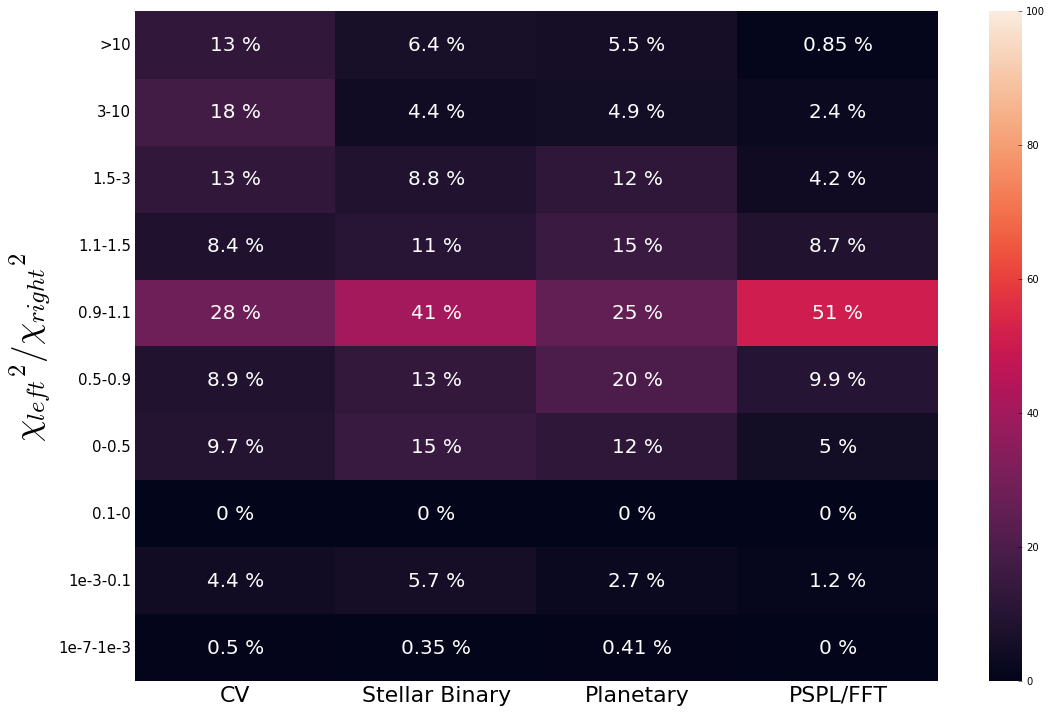

In [12]:
# What fraction of each type is within each range

import seaborn as sns

#sns.set(font_scale=2)
ax = sns.heatmap(df_hm, annot=True, vmin=0, vmax=100,annot_kws={"size": 20})
ax.invert_yaxis()
ax.set_ylabel('${{\chi}_{left}}^2 / {{\chi}_{right}}^2$', fontsize=35)
ax.tick_params(axis='both', which='major', labelsize=15, length=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 22)
for t in ax.texts: t.set_text(t.get_text() + " %")

fig = plt.gcf()
fig.set_size_inches(18.0,12.0)

#plt.savefig('Chebyshev_coeff_squared.png')

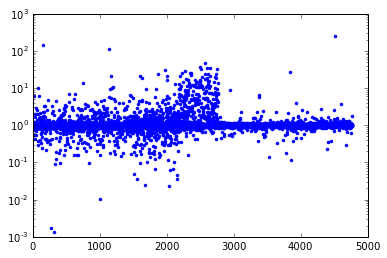

In [102]:
plt.plot(info.reduced_chisqr_ratio_wings[info.reduced_chisqr_ratio_wings<1e4], 'b.')
plt.yscale('log')

# For Info1, we want to see what fraction of each reduced ratio range has a certain type


In [13]:
label2 = 'reduced_chisqr_ratio_wings'
range1 = float(len(info[(info[label2]>0.001) & (info[label2]<0.1)]))
range2 = float(len(info[(info[label2]>0.1) & (info[label2]<0.5)]))
range3 = float(len(info[(info[label2]>0.5) & (info[label2]<0.9)]))
range4 = float(len(info[(info[label2]>0.9) & (info[label2]<1.1)]))
range5 = float(len(info[(info[label2]>1.1) & (info[label2]<1.5)]))
range6 = float(len(info[(info[label2]>1.5) & (info[label2]<3)]))
range7 = float(len(info[(info[label2]>3) & (info[label2]<10)]))
range8 = float(len(info[(info[label2]>10)]))

In [14]:

index = ['0.001-0.1','0.1-0.5','0.5-0.9', '0.9-1.1', '1.1-1.5', '1.5-3', '3-10','>10']#,'1.5-10']
col = ['CV','Stellar Binary','Planetary','PSPL/FFT']
label = 'chisqr_ratio_wings'
value = [[len(info[((info[label2]>0.001) & (info[label2]<0.1)) &(info.type==0)])/range1, 
         len(info[((info[label2]>0.1) & (info[label2]<0.5)) &(info.type==0)])/range2,
         len(info[((info[label2]>0.5) & (info[label2]<0.9)) &(info.type==0)])/range3,
         len(info[((info[label2]>0.9) & (info[label2]<1.1)) &(info.type==0)])/range4,
         len(info[((info[label2]>1.1) & (info[label2]<1.5)) &(info.type==0)])/range5,
         len(info[((info[label2]>1.5) & (info[label2]<3)) &(info.type==0)])/range6,
         len(info[((info[label2]>3) & (info[label2]<10)) &(info.type==0)])/range7,
         len(info[(info[label2]>10) & (info.type==0)])/range8],
         
         [len(info[((info[label2]>0.001) & (info[label2]<0.1)) &(info.type==1)])/range1, 
         len(info[((info[label2]>0.1) & (info[label2]<0.5)) &(info.type==1)])/range2,
         len(info[((info[label2]>0.5) & (info[label2]<0.9)) &(info.type==1)])/range3,
         len(info[((info[label2]>0.9) & (info[label2]<1.1)) &(info.type==1)])/range4,
         len(info[((info[label2]>1.1) & (info[label2]<1.5)) &(info.type==1)])/range5,
         len(info[((info[label2]>1.5) & (info[label2]<3)) &(info.type==1)])/range6,
         len(info[((info[label2]>3) & (info[label2]<10)) &(info.type==1)])/range7,
         len(info[(info[label2]>10) & (info.type==1)])/range8],
         
         [len(info[((info[label2]>0.001) & (info[label2]<0.1)) &(info.type==2)])/range1, 
         len(info[((info[label2]>0.1) & (info[label2]<0.5)) &(info.type==2)])/range2,
         len(info[((info[label2]>0.5) & (info[label2]<0.9)) &(info.type==2)])/range3,
         len(info[((info[label2]>0.9) & (info[label2]<1.1)) &(info.type==2)])/range4,
         len(info[((info[label2]>1.1) & (info[label2]<1.5)) &(info.type==2)])/range5,
         len(info[((info[label2]>1.5) & (info[label2]<3)) &(info.type==2)])/range6,
         len(info[((info[label2]>3) & (info[label2]<10)) &(info.type==2)])/range7,
         len(info[(info[label2]>10) & (info.type==2)])/range8],
         
         [len(info[((info[label2]>0.001) & (info[label2]<0.1)) &(info.type==3)])/range1, 
         len(info[((info[label2]>0.1) & (info[label2]<0.5)) &(info.type==3)])/range2,
         len(info[((info[label2]>0.5) & (info[label2]<0.9)) &(info.type==3)])/range3,
         len(info[((info[label2]>0.9) & (info[label2]<1.1)) &(info.type==3)])/range4,
         len(info[((info[label2]>1.1) & (info[label2]<1.5)) &(info.type==3)])/range5,
         len(info[((info[label2]>1.5) & (info[label2]<3)) &(info.type==3)])/range6,
         len(info[((info[label2]>3) & (info[label2]<10)) &(info.type==3)])/range7,
         len(info[(info[label2]>10) & (info.type==3)])/range8]]

In [15]:
df_hm = pd.DataFrame(np.dot(100,value), index=col, columns=index)

In [16]:
df_hm = np.round(df_hm, 0)

In [19]:
df_hm = df_hm.T

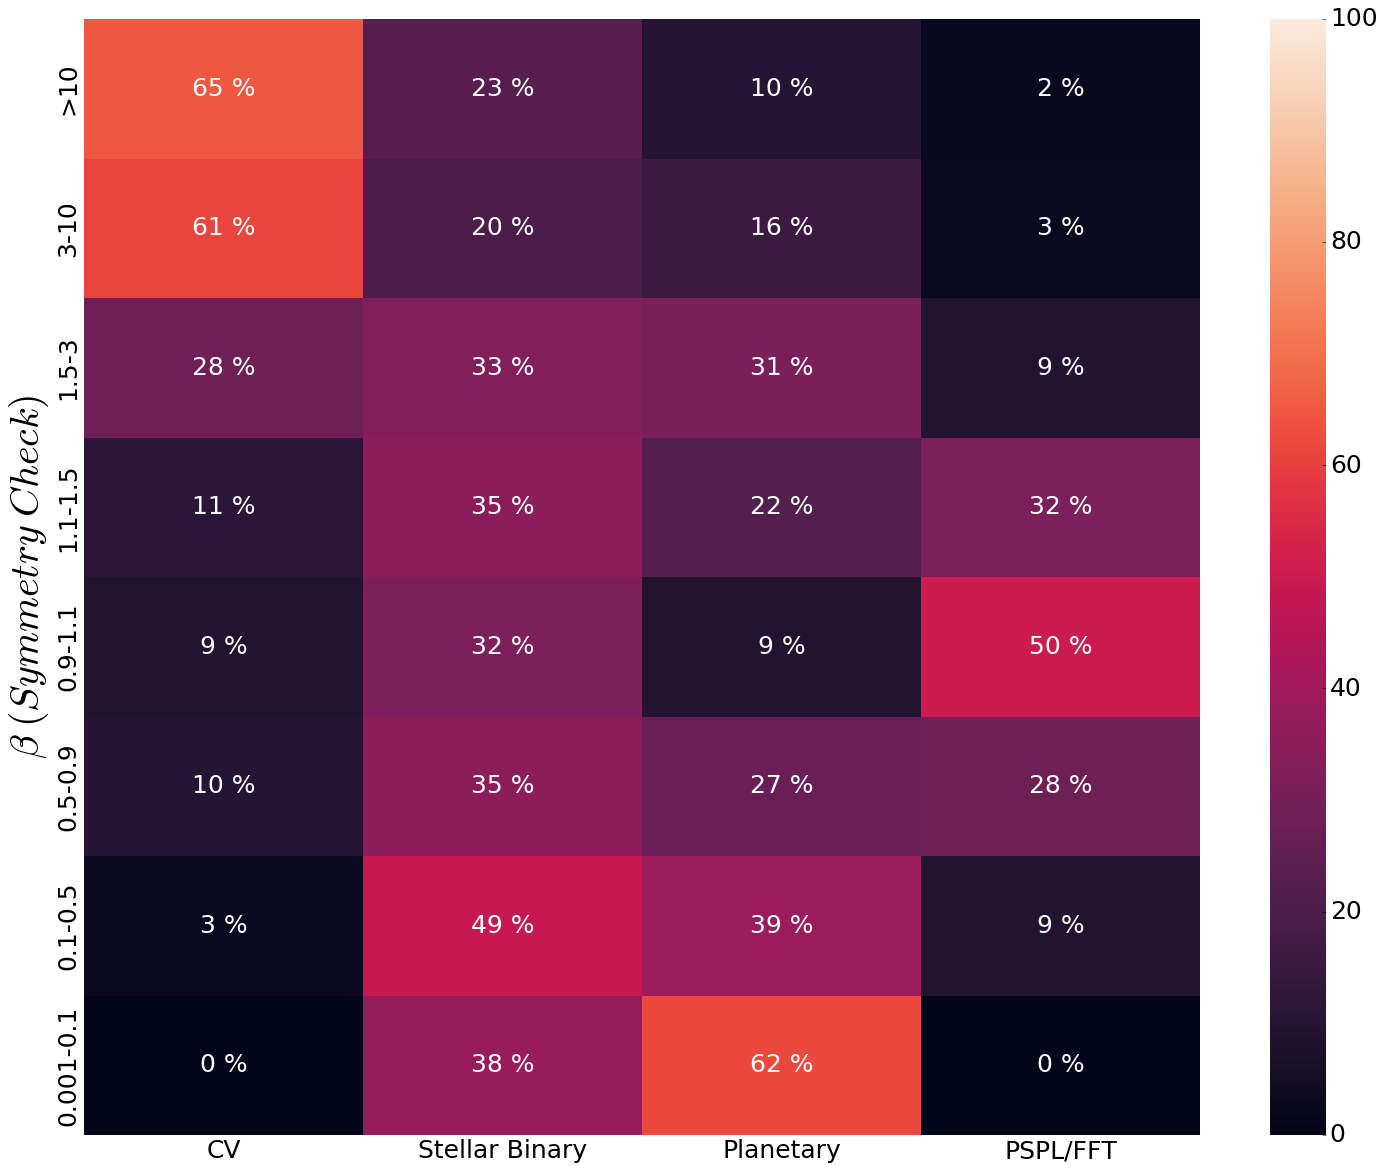

In [27]:
#What fraction of each range has a certain type for the ratios larger or smaller than 1

import seaborn as sns

# sns.set(font_scale=3)
ax = sns.heatmap(df_hm, annot=True, vmin=0, vmax=100,annot_kws={"size": 25})
ax.invert_yaxis()
ax.set_ylabel(r'$\beta \; (Symmetry \;Check)$', fontsize=40)
#ax.set_ylabel('${{\chi}_{left}}^2 / {{\chi}_{right}}^2$', fontsize=35)


ax.tick_params(axis='both', which='major', labelsize=15, length=0)
ax.set_xticklabels(col, rotation = 0, fontsize = 25)
ax.set_yticklabels(ax.get_yticklabels(), rotation = 90, fontsize = 25)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=25)

for t in ax.texts: t.set_text(t.get_text() + " %")

fig = plt.gcf()
fig.set_size_inches(25,20.0)

plt.savefig('test_result/Gould_2_par_PSPL/Gould_2par_PSPL_symmetry_check2_V2.png')

# For Info1, we want to see what fraction of each ratio range has a certain type

In [189]:
label = 'chisqr_ratio_wings'
range1 = float(len(info[(info[label]>1e-7) & (info[label]<0.1)]))
range2 = float(len(info[(info[label]>0.1) & (info[label]<0.5)]))
range3 = float(len(info[(info[label]>0.5) & (info[label]<0.9)]))
range4 = float(len(info[(info[label]>0.9) & (info[label]<1.1)]))
range5 = float(len(info[(info[label]>1.1) & (info[label]<1.5)]))
range6 = float(len(info[(info[label]>1.5) & (info[label]<3)]))
range7 = float(len(info[(info[label]>3) & (info[label]<10)]))
range8 = float(len(info[(info[label]>10)]))

In [190]:

index = ['1e-7-0.1','0.1-0.5','0.5-0.9', '0.9-1.1', '1.1-1.5', '1.5-3', '3-10','>10']#,'1.5-10']
col = ['CV','Stellar Binary','Planetary','PSPL/FFT']
label = 'chisqr_ratio_wings'
value = [[len(info[info['type']==0][(info[label][info['type']==0]>1e-7) & (info[label][info['type']==0]<0.1)])/range1, 
         len(info[info['type']==0][(info[label][info['type']==0]>0.1) & (info[label][info['type']==0]<0.5)])/range2,
         len(info[info['type']==0][(info[label][info['type']==0]>0.5) & (info[label][info['type']==0]<0.9)])/range3,
         len(info[info['type']==0][(info[label][info['type']==0]>0.9) & (info[label][info['type']==0]<1.1)])/range4,
         len(info[info['type']==0][(info[label][info['type']==0]>1.1) & (info[label][info['type']==0]<1.5)])/range5,
         len(info[info['type']==0][(info[label][info['type']==0]>1.5) & (info[label][info['type']==0]<3)])/range6,
         len(info[info['type']==0][(info[label][info['type']==0]>3) & (info[label][info['type']==0]<10)])/range7,
         len(info[info['type']==0][(info[label][info['type']==0]>10)])/range8],
         
         [len(info[info['type']==1][(info[label][info['type']==1]>1e-7) & (info[label][info['type']==1]<0.1)])/range1, 
         len(info[info['type']==1][(info[label][info['type']==1]>0.1) & (info[label][info['type']==1]<0.5)])/range2,
         len(info[info['type']==1][(info[label][info['type']==1]>0.5) & (info[label][info['type']==1]<0.9)])/range3,
         len(info[info['type']==1][(info[label][info['type']==1]>0.9) & (info[label][info['type']==1]<1.1)])/range4,
         len(info[info['type']==1][(info[label][info['type']==1]>1.1) & (info[label][info['type']==1]<1.5)])/range5,
         len(info[info['type']==1][(info[label][info['type']==1]>1.5) & (info[label][info['type']==1]<3)])/range6,
         len(info[info['type']==1][(info[label][info['type']==1]>3) & (info[label][info['type']==1]<10)])/range7,
         len(info[info['type']==1][(info[label][info['type']==1]>10)])/range8],
         
         [len(info[info['type']==2][(info[label][info['type']==2]>1e-7) & (info[label][info['type']==2]<0.1)])/range1, 
         len(info[info['type']==2][(info[label][info['type']==2]>0.1) & (info[label][info['type']==2]<0.5)])/range2,
         len(info[info['type']==2][(info[label][info['type']==2]>0.5) & (info[label][info['type']==2]<0.9)])/range3,
         len(info[info['type']==2][(info[label][info['type']==2]>0.9) & (info[label][info['type']==2]<1.1)])/range4,
         len(info[info['type']==2][(info[label][info['type']==2]>1.1) & (info[label][info['type']==2]<1.5)])/range5,
         len(info[info['type']==2][(info[label][info['type']==2]>1.5) & (info[label][info['type']==2]<3)])/range6,
         len(info[info['type']==2][(info[label][info['type']==2]>3) & (info[label][info['type']==2]<10)])/range7,
         len(info[info['type']==2][(info[label][info['type']==2]>10)])/range8],
         
         [len(info[info['type']==3][(info[label][info['type']==3]>1e-7) & (info[label][info['type']==3]<0.1)])/range1, 
         len(info[info['type']==3][(info[label][info['type']==3]>0.1) & (info[label][info['type']==3]<0.5)])/range2,
         len(info[info['type']==3][(info[label][info['type']==3]>0.5) & (info[label][info['type']==3]<0.9)])/range3,
         len(info[info['type']==3][(info[label][info['type']==3]>0.9) & (info[label][info['type']==3]<1.1)])/range4,
         len(info[info['type']==3][(info[label][info['type']==3]>1.1) & (info[label][info['type']==3]<1.5)])/range5,
         len(info[info['type']==3][(info[label][info['type']==3]>1.5) & (info[label][info['type']==3]<3)])/range6,
         len(info[info['type']==3][(info[label][info['type']==3]>3) & (info[label][info['type']==3]<10)])/range7,
         len(info[info['type']==3][(info[label][info['type']==3]>10)])/range8]]

In [191]:
df_hm = pd.DataFrame(np.dot(100,value), index=col, columns=index)

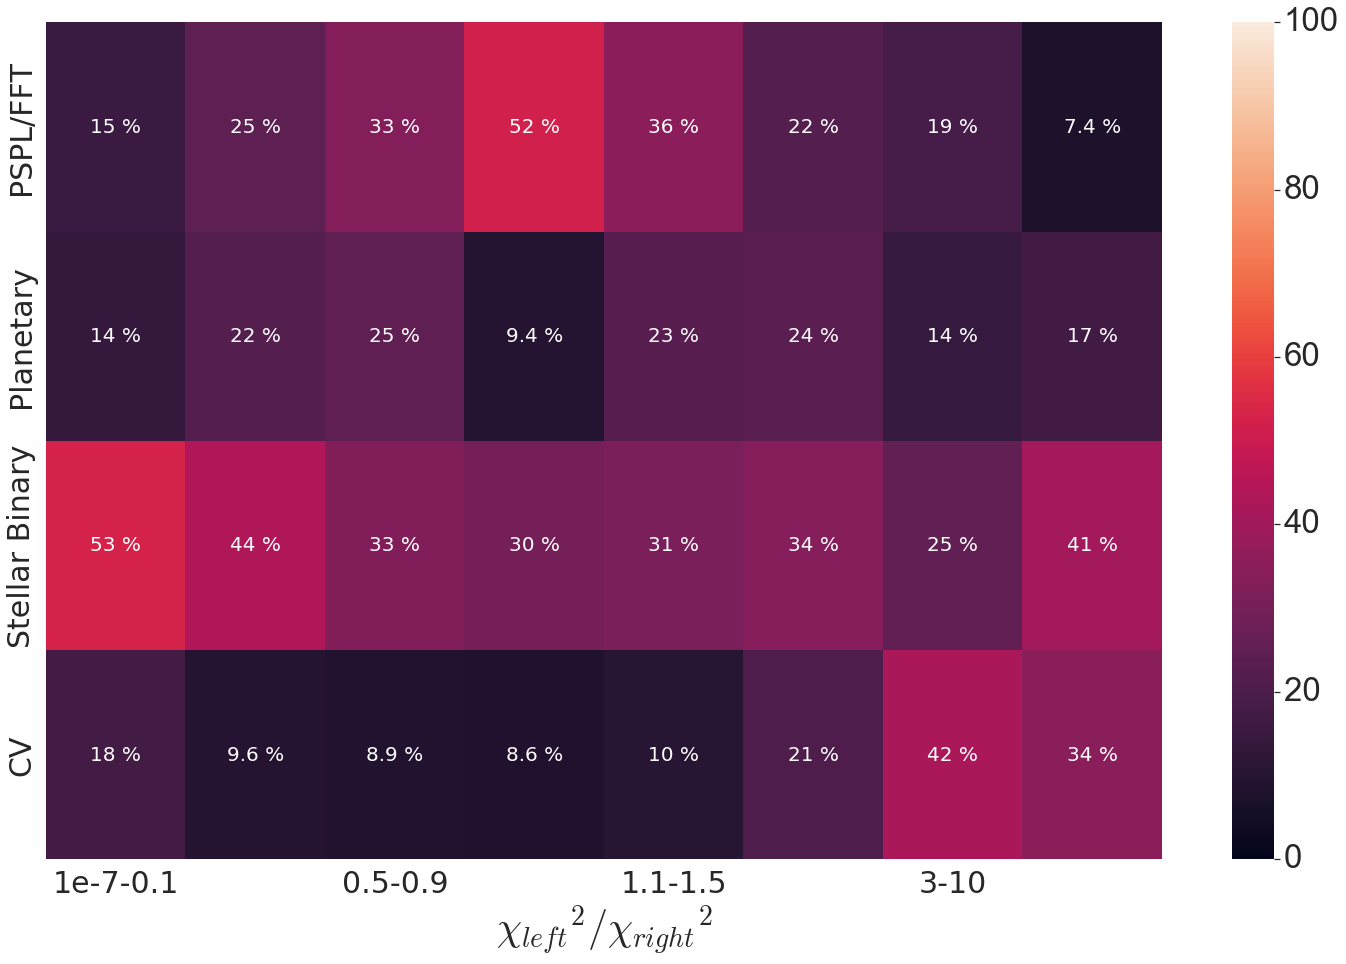

In [192]:
#What fraction of each range has a certain type for the ratios larger or smaller than 1

import seaborn as sns

#sns.set(font_scale=2)
ax = sns.heatmap(df_hm, annot=True, vmin=0, vmax=100,annot_kws={"size": 20})
ax.invert_yaxis()
ax.set_xlabel('${{\chi}_{left}}^2 / {{\chi}_{right}}^2$', fontsize=40)
#ax.set_ylabel('${{\chi}_{left}}^2 / {{\chi}_{right}}^2$', fontsize=35)


ax.tick_params(axis='both', which='major', labelsize=15, length=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 30)
ax.set_yticklabels(ax.get_yticklabels(), rotation = 90, fontsize = 30)


for t in ax.texts: t.set_text(t.get_text() + " %")

fig = plt.gcf()
fig.set_size_inches(25,15.0)

plt.savefig('Gould_2par_PSPL_symmetry_check.png')

# For Info2, we want to see what fraction of each ratio range has a certain type

In [ ]:
range4 = float(len(info2[(info2[label]>1.0) & (info2[label]<1.1)]))
range5 = float(len(info2[(info2[label]>1.1) & (info2[label]<1.5)]))
range6 = float(len(info2[(info2[label]>1.5) & (info2[label]<3)]))
range7 = float(len(info2[(info2[label]>3) & (info2[label]<10)]))
range8 = float(len(info2[(info2[label]>10)]))

In [ ]:

index = [ '1.0-1.1', '1.1-1.5', '1.5-3', '3-10','>10']#,'1.5-10']
col = ['CV','Stellar Binary','Planetary','PSPL/FFT']
label = 'chisqr_ratio_wings'
value = [[
         len(info2[info2['type']==0][(info2[label][info2['type']==0]>1.0) & (info2[label][info2['type']==0]<1.1)])/range4,
         len(info2[info2['type']==0][(info2[label][info2['type']==0]>1.1) & (info2[label][info2['type']==0]<1.5)])/range5,
         len(info2[info2['type']==0][(info2[label][info2['type']==0]>1.5) & (info2[label][info2['type']==0]<3)])/range6,
         len(info2[info2['type']==0][(info2[label][info2['type']==0]>3) & (info2[label][info2['type']==0]<10)])/range7,
         len(info2[info2['type']==0][(info2[label][info2['type']==0]>10)])/range8],
         
         [
         len(info2[info2['type']==1][(info2[label][info2['type']==1]>1.1) & (info2[label][info2['type']==1]<1.1)])/range4,
         len(info2[info2['type']==1][(info2[label][info2['type']==1]>1.1) & (info2[label][info2['type']==1]<1.5)])/range5,
         len(info2[info2['type']==1][(info2[label][info2['type']==1]>1.5) & (info2[label][info2['type']==1]<3)])/range6,
         len(info2[info2['type']==1][(info2[label][info2['type']==1]>3) & (info2[label][info2['type']==1]<10)])/range7,
         len(info2[info2['type']==1][(info2[label][info2['type']==1]>10)])/range8],
         
         [
         len(info2[info2['type']==2][(info2[label][info2['type']==2]>1.0) & (info2[label][info2['type']==2]<1.1)])/range4,
         len(info2[info2['type']==2][(info2[label][info2['type']==2]>1.1) & (info2[label][info2['type']==2]<1.5)])/range5,
         len(info2[info2['type']==2][(info2[label][info2['type']==2]>1.5) & (info2[label][info2['type']==2]<3)])/range6,
         len(info2[info2['type']==2][(info2[label][info2['type']==2]>3) & (info2[label][info2['type']==2]<10)])/range7,
         len(info2[info2['type']==2][(info2[label][info2['type']==2]>10)])/range8],
         
         [
         len(info2[info2['type']==3][(info2[label][info2['type']==3]>1.0) & (info2[label][info2['type']==3]<1.1)])/range4,
         len(info2[info2['type']==3][(info2[label][info2['type']==3]>1.1) & (info2[label][info2['type']==3]<1.5)])/range5,
         len(info2[info2['type']==3][(info2[label][info2['type']==3]>1.5) & (info2[label][info2['type']==3]<3)])/range6,
         len(info2[info2['type']==3][(info2[label][info2['type']==3]>3) & (info2[label][info2['type']==3]<10)])/range7,
         len(info2[info2['type']==3][(info2[label][info2['type']==3]>10)])/range8]]

In [ ]:
df_hm = pd.DataFrame(np.dot(100,value), index=col, columns=index)

In [ ]:
#What fraction of each range has a certain type for the ratios larger than 1

import seaborn as sns

#sns.set(font_scale=2)
ax = sns.heatmap(df_hm, annot=True, vmin=0, vmax=100,annot_kws={"size": 20})
ax.invert_yaxis()
ax.set_ylabel('${{\chi}_{left}}^2 / {{\chi}_{right}}^2$', fontsize=35)
ax.tick_params(axis='both', which='major', labelsize=15, length=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 22)
for t in ax.texts: t.set_text(t.get_text() + " %")

fig = plt.gcf()
fig.set_size_inches(18.0,12.0)

#plt.savefig('Chebyshev_coeff_squared.png')

In [ ]:
info['delta_chisqr']= np.abs(info['chi_sqr_base']-info['min_chi_sqr'])

In [ ]:
info['reduced_chisqr'] = info['min_chi_sqr']/info['DOF']

In [ ]:
info['reduced_chisqr_base'] = info['chi_sqr_base']/info['DOF']

In [ ]:
info['reduced_delta_chisqr'] = info['delta_chisqr']/info['DOF']

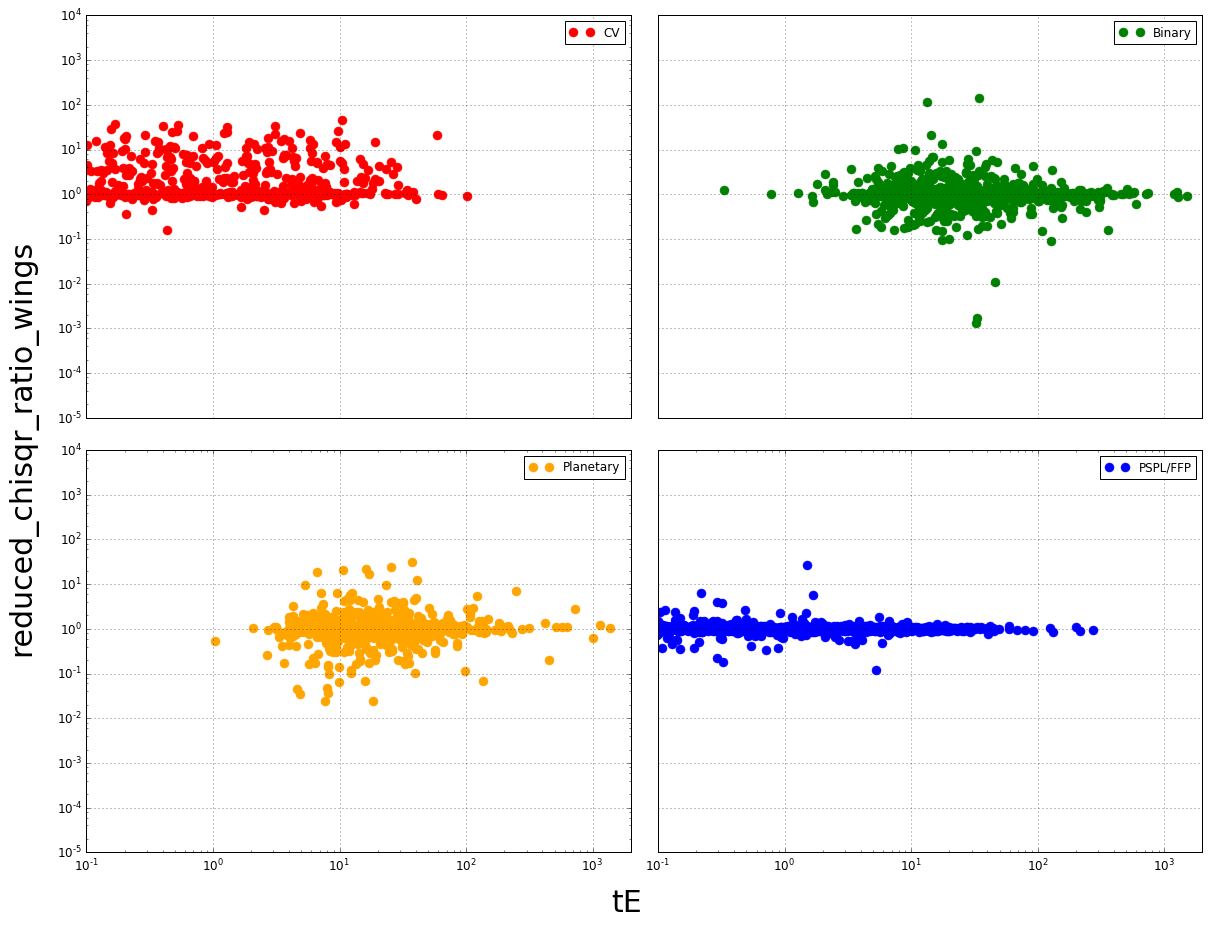

In [105]:
# General format for plotting different parameters versus each other 

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

x = 'tE'
y = 'reduced_chisqr_ratio_wings'
c_x = 1.0 #1.0/(38563)
c_y = 1
axs[0,0].plot(c_x*(info[x][info['type']==0]).astype(float).abs(),(info[y][info['type']==0]).astype(float).abs(), '.',markersize=18, label= 'CV',color='r')
#axs[0,0].plot(c_x*(info[x][info['type']==0]).astype(float).abs(),c_x*(info[x][info['type']==0]).astype(float).abs(), 'k-')
axs[0,0].grid()
axs[0,0].legend()
axs[0,1].plot(c_x*(info[x][info['type']==1]).astype(float).abs(),(info[y][info['type']==1]).astype(float).abs(), '.',markersize=18, label= 'Binary', color='g')
#axs[0,1].plot(c_x*(info[x][info['type']==1]).astype(float).abs(),c_x*(info[x][info['type']==1]).astype(float).abs(), 'r-')
axs[0,1].grid()
axs[0,1].legend()
axs[1,0].plot(c_x*(info[x][info['type']==2]).astype(float).abs(),(info[y][info['type']==2]).astype(float).abs(), '.',markersize=18, label= 'Planetary',  color = 'orange')
#axs[1,0].plot(c_x*(info[x][info['type']==2]).astype(float).abs(),c_x*(info[x][info['type']==2]).astype(float).abs(), 'g-')
axs[1,0].grid()
axs[1,0].legend()
axs[1,1].plot(c_x*(info[x][info['type']==3]).astype(float).abs(),(info[y][info['type']==3]).astype(float).abs(), '.',markersize=18, label= 'PSPL/FFP', color='blue')
#axs[1,1].plot(c_x*(info[x][info['type']==3]).astype(float).abs(),c_x*(info[x][info['type']==3]).astype(float).abs(), 'g-')
axs[1,1].grid()
axs[1,1].legend()


axs[0, 1].tick_params(axis='x',which='both', bottom='off', top='off',labelbottom='off')
axs[0, 1].tick_params(axis='y',which='both', bottom='right', top='left',labelleft='off',length=0)

axs[0, 0].tick_params(axis='y',which='both', labelsize=12)
axs[1, 0].tick_params(axis='both',which='both', labelsize=12)
axs[1, 1].tick_params(axis='x',which='both', labelsize=12)

plt.yscale('log')
plt.xscale('log')



axs[0, 0].tick_params(axis='x',which='both', bottom='off', top='off',labelbottom='off')
axs[1, 1].tick_params(axis='y',which='both', bottom='right', top='left',labelleft='off', length=0)

ylim = (1e-5,1e4)
xlim = (0.1,2000)

axs[0,0].set_ylim(ylim)
axs[0,0].set_xlim(xlim)
axs[0,1].set_ylim(ylim)
axs[0,1].set_xlim(xlim)
axs[1,0].set_ylim(ylim)
axs[1,0].set_xlim(xlim)
axs[1,1].set_ylim(ylim)
axs[1,1].set_xlim(xlim)


plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=0.05, hspace=0.08) 

fig.text(0.5, 0.07, x, ha='center',size=30)
fig.text(0.07, 0.5, y, va='center', rotation='vertical',size=30)

fig = plt.gcf()
fig.set_size_inches(20.0,15.0)
#fig.savefig('a4-a2.png')

In [ ]:
info[['name', 't0', 't0_exp']][(info.f1_exp>1) & (info.type == 3)]

In [ ]:
info['t0_exp'] = info['t0_exp']-2458234

In [ ]:
rho_lim = 0.1
x = 'reduced_chisqr'
y = 'reduced_delta_chisqr'

plt.plot(info[x][info.type==0], info[y][info.type==0], '.', markersize=20, label='CV')
plt.plot(info[x][info.type==1], info[y][info.type==1], '.', markersize=20, label= 'Binary')
plt.plot(info[x][info.type==2], info[y][info.type==2], '.', markersize=20, label= 'Planetary')
plt.plot(info[x][info.type==3], info[y][info.type==3], '.', markersize=20, label= 'PSPL/FFP')


plt.legend()

plt.xscale('log')
plt.yscale('log')

#plt.xlim(2,10)

plt.xlabel(x, size=25)
plt.ylabel(y, size=25)

fig = plt.gcf()
fig.set_size_inches(15.0,10.0)